In [50]:
import pandas as pd
import glob

def combine_excel_files_vertically(directory_path):
    # Step 1: Get a list of 
    # all Excel files in the specified directory
    excel_files = glob.glob(f'{directory_path}/*.xlsx')
    
    # Step 2: Initialize an empty list to store DataFrames
    dfs = []

    # Step 3: Loop through each 
    #Excel file and append its data to the list
    for file in excel_files:
        df = pd.read_excel(file)
        dfs.append(df)

    # Step 4: Use pandas.concat to combine 
    # all DataFrames in the list vertically
    combined_df = pd.concat(dfs, axis=0, ignore_index=True)

    return combined_df

# Example usage:
directory_path = '/home/majd/Desktop/Arbeit/Project/Data'  
# Replace with the actual path
result_df = combine_excel_files_vertically(directory_path)

In [51]:
print("result_df.shape: ",result_df.shape)
print(" result_df.columns: ", result_df.columns)


result_df.shape:  (167879, 49)
 result_df.columns:  Index(['Line', 'File', 'TrnID', 'Time', 'Time (with seconds)', 'HP', 'PAL',
       'Min', 'ON', 'OpThreshold', 'ClksThisMin', 'SpClass', 'Qn', 'ICIgood',
       'tWUTrisk', 'Marked', 'Start', 'Time (s)', 'Time (m)', 'Time (h)',
       'Time (h) *5', 'NofClx', 'nActualClx', 'medianKHz', 'avEndF',
       'nRisingIPIs', 'avSPL', 'avPkAt', 'avBWx8', 'TrDur_us', 'AvPRF',
       'nICIrising', 'MinICI_us', 'midpointICI', 'MaxICI_us', 'ClkNofMinICI',
       'ClkNofMaxICI', 'NofClstrs', 'avClstrNx8', 'avclF0', 'avclF1',
       'avPkIPI', 'BeforeIPIratio', 'PreIPIratio', 'Post1IPIratio',
       'Post2IPIratio', 'EndIPIratio', 'EncSpN', 'Time (s).1'],
      dtype='object')


In [52]:
columns_names = ['Time (s)','NofClx', 'nActualClx', 'medianKHz', 'avEndF',
       'nRisingIPIs', 'avSPL', 'avPkAt', 'avBWx8', 'TrDur_us', 
       'AvPRF',
       'nICIrising', 'MinICI_us', 'midpointICI', 'MaxICI_us', 
       'ClkNofMinICI',
       'ClkNofMaxICI', 'NofClstrs', 'avClstrNx8', 'avclF0', 
       'avclF1',
       'avPkIPI', 'BeforeIPIratio', 'PreIPIratio', 
       'Post1IPIratio',
       'Post2IPIratio', 'EndIPIratio','HP','PAL']

In [53]:
def build_dataset(result_df, columns_names):
    
    dataset = result_df[columns_names]
    return dataset

In [54]:
dataset = build_dataset(result_df=result_df, columns_names=columns_names)

In [55]:
import numpy as np
import pandas as pd

# Load your data here
# data = pd.read_excel('your_data_file.xlsx')

def create_label(row):
    if row['HP'] == 1:
        return 1
    elif row['PAL'] == 1:
        return 0
    else:
        return np.nan  # Use np.nan for now if neither condition is met

# Applying the function and creating the 'y' column
dataset.loc[:, 'y'] = dataset.apply(create_label, axis=1)

# Drop rows where 'y' is NaN
dataset.dropna(subset=['y'], inplace=True)

# Remove rows that contain '?'
dataset = \
dataset[~dataset.applymap(lambda x: x == '?').any(axis=1)]

/tmp/ipykernel_9524/3775124308.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'y'] = dataset.apply(create_label, axis=1)
/tmp/ipykernel_9524/3775124308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(subset=['y'], inplace=True)
/tmp/ipykernel_9524/3775124308.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset[~dataset.applymap(lambda x: x == '?').any(axis=1)]


In [56]:
dataset.columns

Index(['Time (s)', 'NofClx', 'nActualClx', 'medianKHz', 'avEndF',
       'nRisingIPIs', 'avSPL', 'avPkAt', 'avBWx8', 'TrDur_us', 'AvPRF',
       'nICIrising', 'MinICI_us', 'midpointICI', 'MaxICI_us', 'ClkNofMinICI',
       'ClkNofMaxICI', 'NofClstrs', 'avClstrNx8', 'avclF0', 'avclF1',
       'avPkIPI', 'BeforeIPIratio', 'PreIPIratio', 'Post1IPIratio',
       'Post2IPIratio', 'EndIPIratio', 'HP', 'PAL', 'y'],
      dtype='object')

In [57]:
dataset['y'].value_counts()

y
0.0    164946
1.0      1110
Name: count, dtype: int64

In [58]:
dataset[['PAL']].value_counts(), dataset[['HP']].value_counts()

(PAL
 1.0    164946
 0.0         1
 Name: count, dtype: int64,
 HP
 1     1110
 Name: count, dtype: int64)

In [59]:
# X = dataset.drop(['Time (s)','HP', 'PAL', 'y'], axis=1)
X = dataset.drop(['HP', 'PAL', 'y'], axis=1)
y = dataset[['y']]

In [60]:
y.value_counts()

y  
0.0    164946
1.0      1110
Name: count, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

def traintestsplit(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,
         y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [62]:
X_train, X_test, y_train, y_test = traintestsplit(X, y)

In [64]:
X_train2 = X_train.drop(['Time (s)'], axis=1).values
X_test2 = X_test.drop(['Time (s)'], axis=1).values
y_train2 = y_train.values.ravel()
y_test2 = y_test.values.ravel()

In [65]:
from sklearn.preprocessing import MinMaxScaler, \
StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE

def preprocss_data(X_train, X_test, y_train, 
                   y_test):
    scaler = StandardScaler()
    
    smote = SMOTE(random_state=42)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train_resampled, y_train_resampled = smote.fit_resample(
        X_train, y_train)
    #X_test_resampled, y_test_resampled = smote.fit_resample(
    #    X_test, y_test_transform)

    return X_train_resampled, X_test, \
y_train_resampled, y_test


    
X_train3, X_test3, y_train3, y_test3 = \
preprocss_data(X_train2, X_test2, 
                    y_train2, y_test2)

In [66]:
from sklearn.ensemble import RandomForestClassifier
def train_ForestClassifier(X_train, y_train,n_trees):
    clf = RandomForestClassifier(n_estimators=n_trees,
                                  random_state=42)
    clf.fit(X_train, y_train)
    return clf

In [67]:
randomforest = train_ForestClassifier(X_train3 ,
                                       y_train3,
                                         n_trees=50)

In [68]:
predictions = randomforest.predict(X_test3)


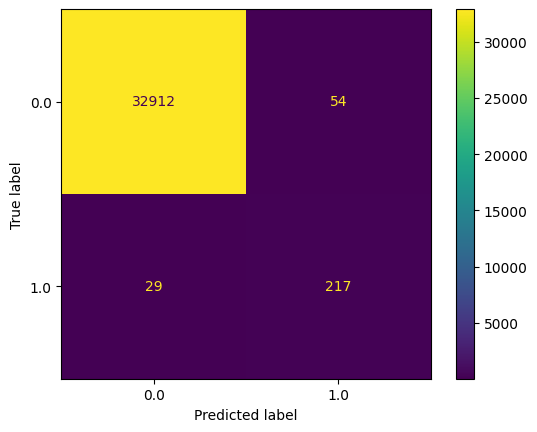

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     32966
         1.0       0.80      0.88      0.84       246

    accuracy                           1.00     33212
   macro avg       0.90      0.94      0.92     33212
weighted avg       1.00      1.00      1.00     33212

Confusion Matrix:
 [[32912    54]
 [   29   217]]


In [69]:
from sklearn.metrics import confusion_matrix, \
ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import \
classification_report, confusion_matrix
from sklearn.metrics import \
accuracy_score, classification_report, confusion_matrix
# Evaluate on the test set
accuracy = accuracy_score(y_test, predictions)


cm = confusion_matrix(y_test, predictions,
                      labels=randomforest.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=randomforest.classes_)
disp.plot()
plt.show()
print("Classification Report:\n", 
      classification_report(y_test, predictions))
print("Confusion Matrix:\n", cm)

In [105]:
predictions2 = pd.DataFrame({
    'Predictions': predictions})

In [128]:
X_test4 = pd.concat([X_test['Time (s)'],y_test['y'],
                    predictions2['Predictions']], axis=1,
                    ignore_index=False,join='inner',
                    sort=True)

In [129]:
X_test4

Time (s)    y  Predictions
0                        0.085805  0.0          0.0
12                       0.085464  0.0          0.0
20                       0.175743  0.0          0.0
22                       0.176082  0.0          0.0
24                       0.177144  0.0          0.0
...                           ...  ...          ...
33189  2023-05-02 22:47:15.056000  0.0          0.0
33192  2023-05-02 22:47:15.183000  0.0          0.0
33194  2023-05-02 22:47:15.270000  0.0          0.0
33204  2023-05-02 22:47:34.620000  0.0          0.0
33210  2023-05-02 22:47:36.061000  0.0          0.0

[6200 rows x 3 columns]

In [130]:
X_test4.to_csv('out.csv')